In [4]:
import json
import jsonlines
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
dir_path = "../Data/annotations/"
ano = "open_images_train_v6_captions.jsonl"

In [25]:
image_id = []
captions = []
with jsonlines.open(dir_path+ano, 'r') as f:
    for line in f.iter():
        if line['image_id'][0] == '0':
            image_id.append(line['image_id'])
            captions.append(line['caption'])
    
open_ano.close()

In [26]:
annotations = pd.DataFrame(image_id, columns=['image_id'])
annotations['caption'] = captions

In [27]:
annotations

image_id                                            caption
0      03f8fb9315c004e5  In this picture I can observe a man and woman....
1      09f842eb7fc8b8f3  In this image, I see a lot of desert plants wh...
2      02838608f46d5b2c  In this picture I can observe water tank in th...
3      0eef1a67bb82203c  On the left and right side of the image we can...
4      0803eef805e2cb46  In this image I can see a plant along with the...
...                 ...                                                ...
45440  03a962793750cc8d  In this image, I can see the inside view of a ...
45441  006c36098228cd2c  In the center of the image we can see name boa...
45442  0d63a639cae1e867  In this picture we can see a Barbie doll stand...
45443  00ee99239d3a6eac  In this picture we can see two plates on the s...
45444  00ef01c79e2eb9b0  In this image we can see a girl standing and l...

[45445 rows x 2 columns]

In [15]:
path = '../Data/train_0/'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(img)
            
print('Images: ',len(img_names))

Images:  156541


In [22]:
print(img_names[:5])

['0d602fc924a0a2a5.jpg', '0d5ad6dead4fd8d4.jpg', '0061e0fb55ff2d5c.jpg', '0abf55bf669af9c6.jpg', '0383b6b35606ce7e.jpg']


In [61]:
keyword = ['fire',
           'forest fire',
           'firefighter',
           'burst',
           'explode',
           'explosion',
           'blast',
           'detonation',
           'detonated',
           'burned'
        ]
exclude_keyword = ['blazer','horse','candle',
                   'fireplace',
                   #'fire place',
                   'lamp',
                   'man',
       #            'person',
                   'photograph',
                   'people',
                   'ski','board','says','oven','wood','cook', 'living', 'plug', 'hyr', 'food', 'young','kitchen', 'extinguisher',
                 'fireworks','vintage','department', 'kid', 'boy', 'grill','fire station','fox','engine', 'hyd','fires','jet','rocket']
k_image_id = []

In [62]:
find = annotations[annotations['caption'].str.contains('dododo', case=False)]

for i in keyword:
    find2 = annotations[annotations['caption'].str.contains(i, case=False)]
    find = pd.concat([find,find2], ignore_index=True)
    print(f'keyword : [{i}] // found: {len(find2)}')
print(f'final : {len(find)}')
## 결측지 유발 키워드 삭제
for i in exclude_keyword:
    origin_len = len(find)
    find = find[~find['caption'].str.contains(i, case=False)]
    print(f'excluded keyword:[{i}] found: {origin_len - len(find)}')
print(f'final : {len(find)}')
## 중복 이미지 삭제 (한 이미지에 대한 여러 caption)
find.drop_duplicates(['image_id'], inplace=True ,ignore_index = True, keep = 'first')
print(f'droped duplicate images from multiple captions, After dropped: {len(find)}')
## 인덱스 정렬
find.reset_index(inplace=True, drop=True)
#find

keyword : [fire] // found: 194
keyword : [forest fire] // found: 0
keyword : [firefighter] // found: 0
keyword : [burst] // found: 1
keyword : [explode] // found: 0
keyword : [explosion] // found: 0
keyword : [blast] // found: 0
keyword : [detonation] // found: 0
keyword : [detonated] // found: 0
keyword : [burned] // found: 0
final : 195
excluded keyword:[blazer] found: 1
excluded keyword:[horse] found: 0
excluded keyword:[candle] found: 8
excluded keyword:[fireplace] found: 26
excluded keyword:[lamp] found: 5
excluded keyword:[man] found: 30
excluded keyword:[people] found: 32
excluded keyword:[ski] found: 0
excluded keyword:[board] found: 14
excluded keyword:[says] found: 0
excluded keyword:[oven] found: 0
excluded keyword:[wood] found: 7
excluded keyword:[cook] found: 0
excluded keyword:[living] found: 0
excluded keyword:[plug] found: 0
excluded keyword:[hyr] found: 0
excluded keyword:[food] found: 5
excluded keyword:[young] found: 0
excluded keyword:[kitchen] found: 0
excluded key

In [81]:
find['image_id'].value_counts().index.sort_values()

Index(['0011110e4b53f001', '00742cd468e40de6', '007e956374f53fd6',
       '0177c759a586204e', '01820beaedcf1098', '0218f76dff06752d',
       '022382ad7263c5d7', '02eab4f9ad6c0334', '033e280520e74f4a',
       '03707e6dfa665093', '03b15502ac2650d1', '0642fdfbfd0f09e0',
       '065a071c8a61f015', '06b407cc856bed4b', '06cc1a6b11fc3dfe',
       '075d26862f3320db', '0836f9185bc514e9', '084a35a60a8563b1',
       '0877b5b140b00b40', '08d0faa2110fbd20', '098babfaef6adf78',
       '09b73a1976593d99', '0b71eee4ab8af046', '0b7336a537fd038d',
       '0bdfcf59dd6b55ce', '0c6fcfd4ef63f2ca', '0c9c8a9c44c3a968',
       '0ccae80bf0f79928', '0d3b163cb9928bb2', '0d408c4c731cc892',
       '0da7c9c050834bd7', '0df7b9f5df844e62', '0ff7d0615940e7c8'],
      dtype='object')

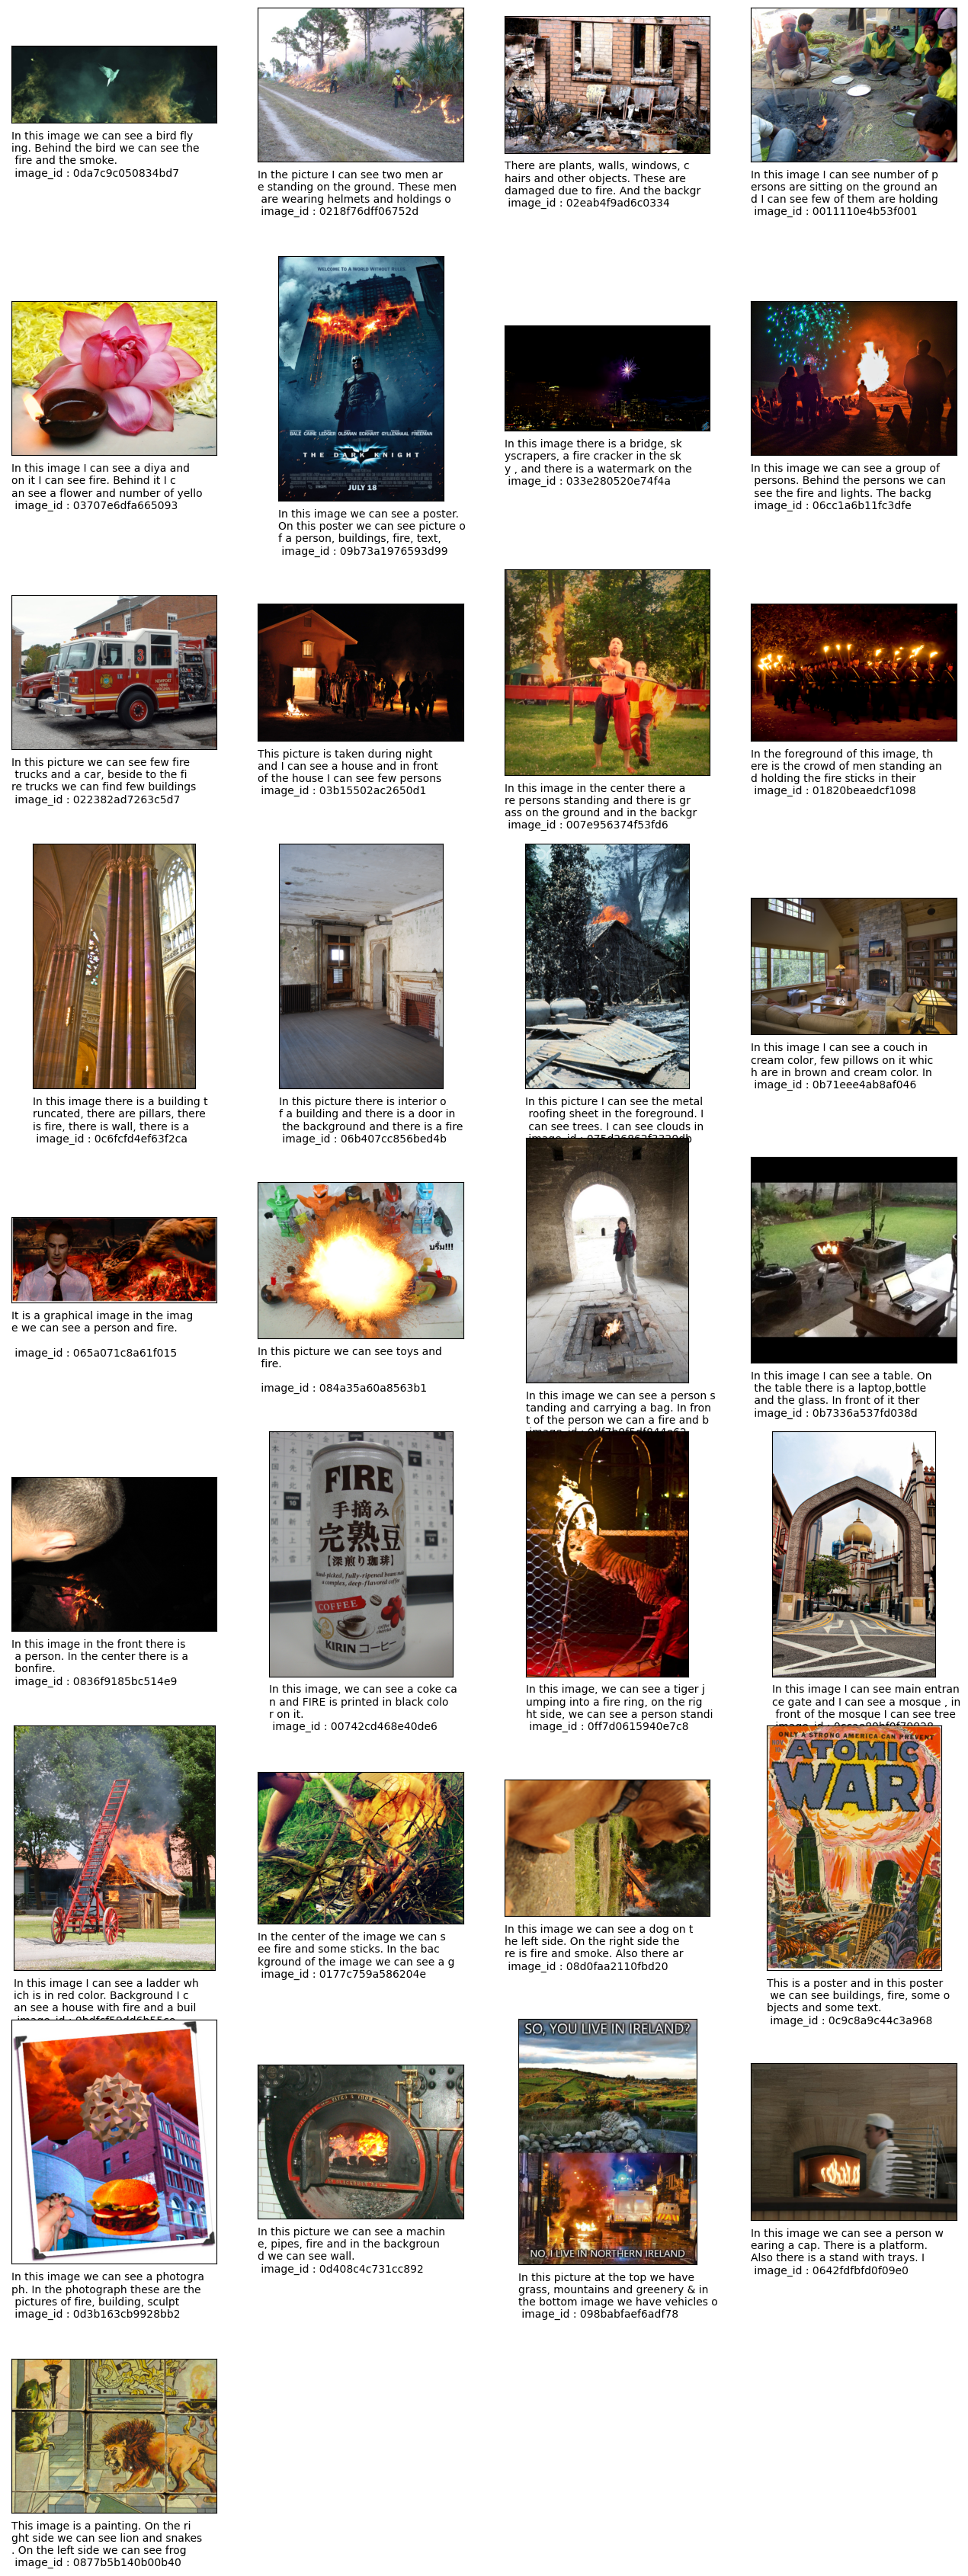

In [82]:
## show img status
plt.figure(figsize=(16,500))
for i in range(len(find)):
    plt.subplot(100,4,i+1)
    
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #k = str(find['image_id'][i]).zfill(12)
    path = "../Data/train_0/" + find['image_id'][i] +'.jpg'
    im_bgr = cv2.imread(path)
    im_rgb = im_bgr[:, :, ::-1]
    plt.imshow(im_rgb, cmap=plt.cm.binary)
    plt.xlabel(find['caption'][i][:35] + '\n' + find['caption'][i][35:70] + '\n' 
               + find['caption'][i][70:105] + '\n image_id : ' + str(find['image_id'][i]) , loc='left', fontsize=10)
    #plt.legend(find['image_id'][i])
plt.show()

In [ ]:
disaster_dataset = ['0023b0e23b369b8d', '002a6cf0d401929c', '009c5fb34590f1ca',
       '00c5ae08ce541b77', '00c83da543764160', '01eb8c867c1e1b4c',
       '01f1e52316674a15', '02272e5568435fda', '0312462f3202e152',
       '03d8b3f81f140e24', '04271eb0aaa7d1e2', '043ac011ff8afcf5',
       '04c71a86edd3fb9b', '04f67c62ee67f74b', '04f6feea6b5d3699',
       '0523fff85e1198e7', '0589d82e0437d121', '0604cb9341631e15',
       '0639c4fcdcfc9989', '0737d240e1558c1b', '07b0752bc282d144',
       '08fef6f3a0e3bbcb', '093fa714b15ddefa', '0968d6e52554d5e1',
       '09942b0191652d57', '0a062782ab19a093', '0c8932fb8675e363',
       '0d155561861fa6ac', '0d7e443c796d4314', '0e693d0227779fe5',
       '0e7cd5ea71ea68c7', '0f60fcb7700d0c69', '0f686e70b61c26cf',
       '0f7368f8fd2f517a']